In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
cwd = os.getcwd()
root = os.path.dirname(cwd)
data_path = os.path.join(root, '13_eclaireur_public','back', 'data', 'communities', 'processed_data')

mp_df = pd.read_csv(os.path.join(data_path, 'all_communities_data.csv'),sep=';',index_col=0)
mp_df.head()


/var/folders/kh/c8yjct5d3s95jbbrgl8221sc0000gn/T/ipykernel_78261/2277716751.py:5: DtypeWarning: Columns (4,5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  mp_df = pd.read_csv(os.path.join(data_path, 'all_communities_data.csv'),sep=';',index_col=0)


,nom,siren,type,cog,cog_3digits,code_departement,code_departement_3digits,code_region,population,epci,url_ptf,url_datagouv,id_datagouv,merge,ptf,trancheEffectifsUniteLegale,EffectifsSup50
0,Guadeloupe,239710015,REG,1,NaN,NaN,NaN,NaN,396153,NaN,https://regionguadeloupe.opendatasoft.com/expl...,NaN,NaN,ptf,KaruData,42.0,True
1,Île-de-France,237500079,REG,11,NaN,NaN,NaN,NaN,12291279,NaN,https://data.iledefrance.fr/explore/?refine.pu...,https://www.data.gouv.fr/fr/organizations/534f...,534fffa8a3a7292c64a780c8,ptf+datagouv,"Ile-de-France, DataGouv",53.0,True
2,Martinique,200055507,CTU,2,NaN,NaN,NaN,NaN,377711,NaN,NaN,NaN,NaN,NaN,NaN,51.0,True
3,Centre-Val de Loire,234500023,REG,24,NaN,NaN,NaN,NaN,2634852,NaN,https://data.centrevaldeloire.fr/explore/?sort...,https://www.data.gouv.fr/fr/organizations/regi...,561a7f00c751df4e6dcdbb48,ptf+datagouv,"Centre Val-de-Loire, DataGouv",51.0,True
4,Bourgogne-Franche-Comté,200053726,REG,27,NaN,NaN,NaN,NaN,2885864,NaN,https://trouver.ternum-bfc.fr/organization/reg...,https://www.data.gouv.fr/fr/organizations/5835...,5835cdb988ee383e0bc65bb3,ptf+datagouv,"Bourgogne-Franche-Comté, DataGouv",51.0,True


In [4]:
com_type_df = mp_df.groupby('type', as_index=False).agg({
    'siren' : [pd.Series.count,pd.Series.nunique],
    'population' : np.sum,
})

In [5]:
com_type_dict = {
    "REG" : "Région",
    "DEP" : "Département",
    "CU" : "Communauté urbaine ",
    "CTU" : "Collectivité territoriale unique" ,
    "COM" : "Commune",
    "MET" : "Métropole",
    "CA" : "Communauté d'agglomérations",
    "CC" : "Communauté de communes",
    "EPT" : "Établissement public territorial",
}

In [6]:
com_type_df

type  siren         population
        count nunique        sum
0   CA    229     227   23680359
1   CC    989     989   21767376
2  COM  34969   34968   68024105
3  CTU      3       3     989068
4   CU     14      14    3119780
5  DEP     98      98   67034919
6  EPT     11      11    4904891
7  MET     24      22   20639612
8  REG     14      14   66772024

In [7]:
com_type_df['type_long'] = com_type_df.type.map(com_type_dict)

In [8]:
to_plot = com_type_df.sort_values(by =('siren','nunique'),ascending=False)
to_plot

type  siren         population                         type_long
        count nunique        sum                                  
2  COM  34969   34968   68024105                           Commune
1   CC    989     989   21767376            Communauté de communes
0   CA    229     227   23680359       Communauté d'agglomérations
5  DEP     98      98   67034919                       Département
7  MET     24      22   20639612                         Métropole
4   CU     14      14    3119780               Communauté urbaine 
8  REG     14      14   66772024                            Région
6  EPT     11      11    4904891  Établissement public territorial
3  CTU      3       3     989068  Collectivité territoriale unique

/Users/coralieclot/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:144: PerformanceWarning: indexing past lexsort depth may impact performance.
  x = data.get(x, x)


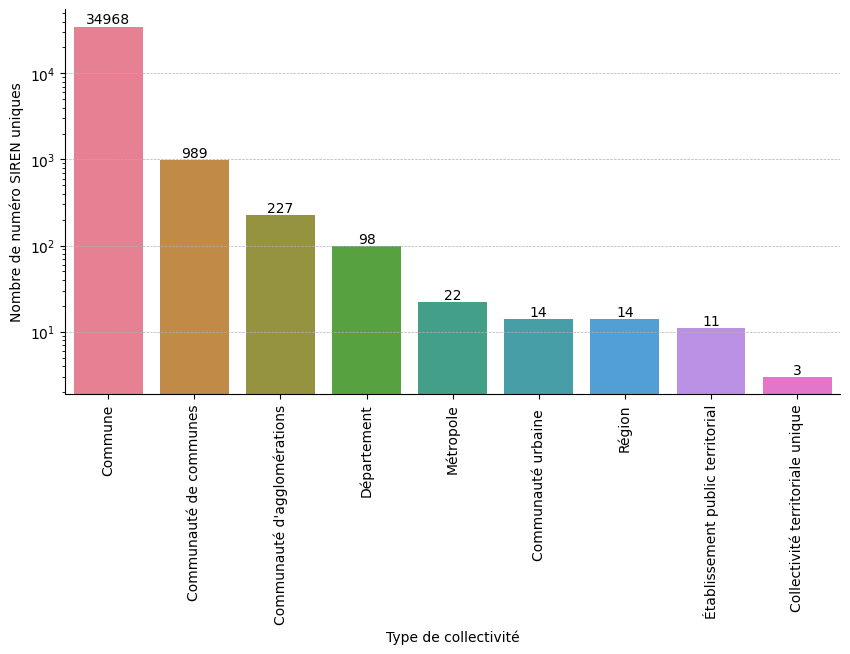

In [9]:
plt.figure(figsize=(10,5))
# getting axes
ax = plt.gca()
ax = sns.barplot(data=to_plot,x=('type_long',),y=('siren','nunique'),palette='husl')
ax.set_yscale('log')
ax.tick_params(axis='x',rotation=90)
ax.set_xlabel('Type de collectivité')
ax.set_ylabel('Nombre de numéro SIREN uniques')
ax.grid(axis="y",linewidth=0.5,linestyle='--')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in ax.containers:
    ax.bar_label(i,);

## C'est quoi ces SIREN non uniques ?

In [11]:
mp_df[mp_df['siren'].duplicated()]

,nom,siren,type,cog,cog_3digits,code_departement,code_departement_3digits,code_region,population,epci,url_ptf,url_datagouv,id_datagouv,merge,ptf,trancheEffectifsUniteLegale,EffectifsSup50
25000,Aincille,216400119,COM,64011,NaN,64,064,75.0,118,200067106.0,NaN,https://www.data.gouv.fr/fr/organizations/6143...,614359a8d6f6b32470dfe28b,datagouv,DataGouv,2.0,False
29388,Paris,217500016,COM,75056,NaN,75,075,11.0,2204773,200054781.0,https://opendata.paris.fr/explore/?sort=modified,https://www.data.gouv.fr/fr/organizations/534f...,534fff89a3a7292c64a77eb7,ptf+datagouv,"Paris, DataGouv",53.0,True
35347,Métropole de Lyon,200046977,MET,NaN,NaN,69,069,84,1402326,NaN,https://data.grandlyon.com/recherche?responsib...,https://www.data.gouv.fr/fr/organizations/534f...,534fff7aa3a7292c64a77e0c,ptf+datagouv,"Métropole de Lyon, DataGouv",52.0,True
35818,Métropole Européenne de Lille,200093201,MET,NaN,NaN,59,059,32,1157126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
35819,Métropole Européenne de Lille,200093201,MET,NaN,NaN,59,059,32,1181692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
35822,CA Agglomération d'Agen,200096956,CA,NaN,NaN,47,047,75,99115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
36002,CA du Pays de l'Or,243400470,CA,NaN,NaN,34,034,76,45153,NaN,NaN,https://www.data.gouv.fr/fr/organizations/5c0f...,5c0f9f618b4c41745fb43104,datagouv,DataGouv,NaN,False
